In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
%matplotlib inline

In [29]:
model_df=pd.read_csv("C:/Users/kushal/Desktop/Walmart/model.csv")
valid_df=pd.read_csv("C:/Users/kushal/Desktop/Walmart/val.csv")
model_df.head()
print(valid_df.head())

      A1     A2        A3        A4     A5     A6    A7      A8     A9    A10  \
0  22.88  75.59   3367.08   6131.31  41.38  43.08  2.13  102.67  0.500  0.500   
1  15.94  86.26   5595.00  10867.86  52.29  61.21  3.05  124.94  3.200  2.400   
2  25.16  64.20   4758.44   7818.15  46.28  50.72  2.69  110.16  1.124  0.889   
3  19.50  77.81   5762.27   6290.00  58.14  76.27  2.44  119.92  1.222  1.000   
4  11.11  85.09  11400.50  20936.25  30.00  29.75  0.50  125.89  2.167  1.333   

   ...   A22   A23   A24   A25     A26      A27     A28    A29    A30  default  
0  ...  0.08  0.00  0.05  0.17    0.00  1035.14  158.71  13.28   0.00        1  
1  ...  0.01  0.00  0.00  0.06  438.50     0.00   72.78  44.88  25.39        1  
2  ...  0.08  0.02  0.02  0.10  622.70   755.52  102.89   6.24   0.00        1  
3  ...  0.04  0.00  0.01  0.08  197.55   396.27   76.34   8.44   2.00        1  
4  ...  0.00  0.00  0.00  0.04    0.00     0.00    0.00   0.00   0.00        1  

[5 rows x 31 columns]


In [30]:
model_df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,...,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,12.134211,83.838361,7319.620881,13449.501569,33.507640,36.983300,1.518232,124.108845,1.697824,1.407075,...,0.074435,0.008550,0.013537,0.133531,290.756534,357.976444,103.482568,28.847016,38.509910,0.115883
std,6.587858,8.672843,2652.539364,8197.452662,11.906865,14.209314,1.007398,33.130292,0.776810,0.652138,...,0.138356,0.020052,0.029078,0.156658,471.958770,597.594147,136.248095,62.759062,90.882963,0.320086
min,0.000000,20.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.010000,-0.020000,-0.020000,0.000000,-751.260000,-405.370000,-616.230000,-490.160000,-719.720000,0.000000
25%,7.670000,79.000000,5618.627500,8700.000000,26.880000,28.780000,0.820000,103.027500,1.272000,1.000000,...,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.970000,0.000000,0.000000,0.000000
50%,12.020000,84.360000,7285.590000,11862.650000,32.770000,35.940000,1.420000,127.240000,1.667000,1.399000,...,0.030000,0.000000,0.010000,0.090000,115.140000,102.265000,59.350000,10.500000,0.000000,0.000000
75%,16.080000,89.670000,8780.870000,15896.575000,39.100000,43.830000,2.020000,143.100000,2.064000,1.714000,...,0.080000,0.010000,0.010000,0.140000,380.142500,485.880000,140.952500,34.860000,49.862500,0.000000
max,62.710000,100.000000,26333.500000,170300.000000,146.000000,146.000000,18.670000,524.000000,44.000000,44.000000,...,5.300000,0.700000,1.690000,4.080000,15288.660000,19503.760000,3265.980000,6561.930000,13487.000000,1.000000


<AxesSubplot:>

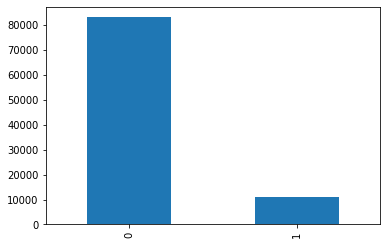

In [20]:
model_df['default'].value_counts().plot(kind='bar')
valid_df['default'].value_counts().plot(kind='bar')
#imbalanced dataset with  a severe class imbalance.
#accuracy in this instance should NOT be the prime metric for evalution
# we will be using SMOTE technique to handle imbalanced dataset

Text(0, 0.5, 'Value')

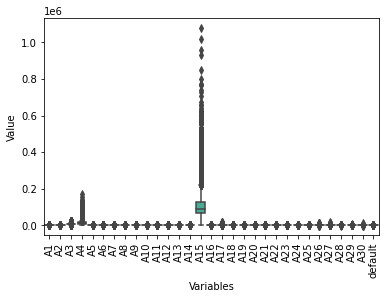

In [31]:
#performance on the minority class that is most important.
import seaborn as sns
sns.boxplot(data=model_df)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Value') 

array([[<AxesSubplot:title={'center':'A1'}>,
        <AxesSubplot:title={'center':'A2'}>,
        <AxesSubplot:title={'center':'A3'}>,
        <AxesSubplot:title={'center':'A4'}>,
        <AxesSubplot:title={'center':'A5'}>,
        <AxesSubplot:title={'center':'A6'}>],
       [<AxesSubplot:title={'center':'A7'}>,
        <AxesSubplot:title={'center':'A8'}>,
        <AxesSubplot:title={'center':'A9'}>,
        <AxesSubplot:title={'center':'A10'}>,
        <AxesSubplot:title={'center':'A11'}>,
        <AxesSubplot:title={'center':'A12'}>],
       [<AxesSubplot:title={'center':'A13'}>,
        <AxesSubplot:title={'center':'A14'}>,
        <AxesSubplot:title={'center':'A15'}>,
        <AxesSubplot:title={'center':'A16'}>,
        <AxesSubplot:title={'center':'A17'}>,
        <AxesSubplot:title={'center':'A18'}>],
       [<AxesSubplot:title={'center':'A19'}>,
        <AxesSubplot:title={'center':'A20'}>,
        <AxesSubplot:title={'center':'A21'}>,
        <AxesSubplot:title={'center':'A2

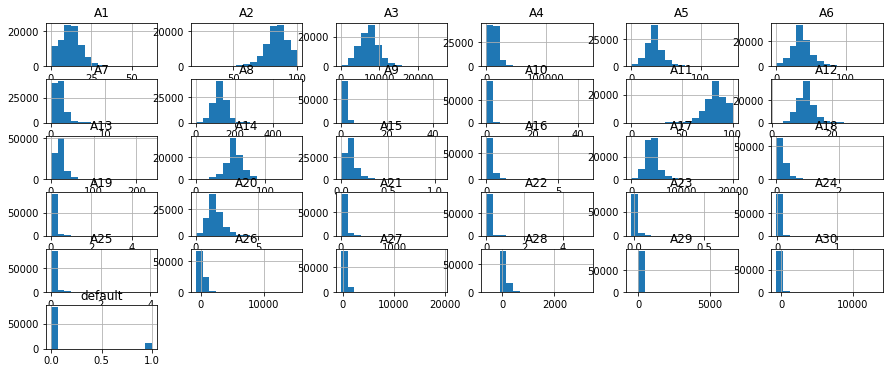

In [32]:
model_df.hist(bins=15, figsize=(15, 6))

In [33]:
import pandas as pd
from sklearn import preprocessing
model_X = model_df.loc[:, model_df.columns != 'default']
model_y = model_df.loc[:, model_df.columns == 'default']
print(model_y)
#y=model_df['default']
#returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler() 
#normalization does not hurt the for nonlinear models but not doing it for linear models will do hurt odds/probability
model_X= min_max_scaler.fit_transform(model_X)
model_X= pd.DataFrame(model_X)
model_X.shape

       default
0            0
1            0
2            0
3            0
4            0
...        ...
93995        1
93996        1
93997        1
93998        1
93999        1

[94000 rows x 1 columns]


(94000, 30)

In [34]:
yval=valid_df['default']
valid_df=valid_df.drop(['default'],axis=1)

min_max_scaler = preprocessing.MinMaxScaler() 
#normalization does not hurt the for nonlinear models but not doing it for linear models will do hurt odds/probability
valid_df= min_max_scaler.fit_transform(valid_df)
valid_df= pd.DataFrame(valid_df)

In [36]:
print(valid_df.shape)
print(model_X.shape)

(11500, 30)
(94000, 30)


In [128]:
#model_df=model_df.drop(const_cols,axis=1)

In [37]:
import pandas as pd
import numpy as np
corr = model_X.corr()
corr.style.background_gradient(cmap='coolwarm')




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.000000,-0.748951,-0.471054,-0.378873,0.492054,0.483082,0.526474,-0.373436,-0.331232,-0.295327,-0.484337,-0.372810,0.398576,0.397312,-0.303691,0.503393,-0.278716,0.456614,0.385320,0.286464,0.009520,0.041449,0.005592,0.042981,0.039630,-0.052968,0.036289,-0.007522,-0.018154,-0.034801
1,-0.748951,1.000000,0.517863,0.407799,-0.482518,-0.482486,-0.618724,0.375246,0.410535,0.380494,0.770950,0.381769,-0.395979,-0.394871,0.377217,-0.381696,0.292379,-0.350420,-0.298464,-0.229001,-0.003766,-0.060587,-0.019050,-0.064202,-0.038414,0.056671,-0.030326,0.016198,0.022400,0.034842
2,-0.471054,0.517863,1.000000,0.665712,-0.515764,-0.568834,-0.445058,0.547352,0.526460,0.487397,0.419552,0.465938,-0.445843,-0.382244,0.541844,-0.280378,0.363778,-0.254478,-0.235661,-0.337238,-0.006657,-0.068615,-0.022535,-0.067817,-0.012097,0.079143,-0.032491,0.028643,0.029465,0.044163
3,-0.378873,0.407799,0.665712,1.000000,-0.315091,-0.412735,-0.379968,0.369470,0.493178,0.390337,0.318121,0.338775,-0.343314,-0.269608,0.583112,-0.217860,0.337408,-0.199547,-0.185777,-0.207659,-0.042018,-0.085139,-0.039447,-0.078386,-0.024151,0.044232,-0.052939,-0.003614,0.013625,0.031632
4,0.492054,-0.482518,-0.515764,-0.315091,1.000000,0.903871,0.391876,-0.434256,-0.294310,-0.285118,-0.372822,-0.396888,0.704559,0.681524,-0.185134,0.267639,-0.254142,0.234799,0.221141,0.364923,0.006974,0.029200,-0.009370,0.028006,0.020678,-0.060580,0.037347,-0.011727,-0.009589,-0.030253
5,0.483082,-0.482486,-0.568834,-0.412735,0.903871,1.000000,0.401520,-0.451374,-0.335913,-0.307062,-0.370367,-0.409220,0.599355,0.641190,-0.231465,0.273023,-0.261100,0.241083,0.223022,0.374750,0.010556,0.036536,-0.004372,0.034941,0.020218,-0.061436,0.041389,-0.010940,-0.008679,-0.031773
6,0.526474,-0.618724,-0.445058,-0.379968,0.391876,0.401520,1.000000,-0.298279,-0.344282,-0.308982,-0.481260,-0.302859,0.341161,0.332789,-0.363371,0.470803,-0.249220,0.422848,0.371383,0.250110,0.037808,0.076212,0.031466,0.073371,0.028496,-0.029096,0.048421,0.007466,-0.001576,-0.022805
7,-0.373436,0.375246,0.547352,0.369470,-0.434256,-0.451374,-0.298279,1.000000,0.287236,0.244410,0.301637,0.843509,-0.343502,-0.462648,0.115539,-0.199455,0.229474,-0.173153,-0.173277,-0.552098,0.004991,-0.001955,0.024085,-0.005212,-0.007704,0.070861,-0.009729,0.044007,0.037701,0.042242
8,-0.331232,0.410535,0.526460,0.493178,-0.294310,-0.335913,-0.344282,0.287236,1.000000,0.911302,0.335947,0.227930,-0.297716,-0.112229,0.554400,-0.194024,0.299464,-0.179986,-0.162913,-0.134941,-0.008593,-0.072741,-0.039863,-0.070636,0.033181,0.047023,-0.013711,0.023007,0.029357,0.024106
9,-0.295327,0.380494,0.487397,0.390337,-0.285118,-0.307062,-0.308982,0.244410,0.911302,1.000000,0.315684,0.185088,-0.270177,-0.071449,0.534133,-0.174595,0.273145,-0.162724,-0.146519,-0.097198,-0.000040,-0.067156,-0.039082,-0.066107,0.050839,0.043492,-0.005433,0.024532,0.026497,0.020610


In [44]:
def correlation(model_X,threshold):
    col_corr=set()
    corr_matrix=model_X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr            

In [49]:
corr_features=correlation(model_X,0.90)
corr_features
model_X=model_X.drop(corr_features,axis=1)

In [50]:
def correlation(valid_df,threshold):
    col_corr=set()
    corr_matrix=valid_df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr   

In [51]:
corr_features=correlation(valid_df,0.90)
corr_features
valid_df=valid_df.drop(corr_features,axis=1)

In [52]:
valid_df.shape

(11500, 28)

In [53]:
model_X.shape

(94000, 28)

In [117]:
#model_df.hist(bins=15, figsize=(15, 6))

In [229]:
model_X.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,...,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,0.193497,0.796068,0.277959,0.078975,0.229504,0.253310,0.081319,0.236849,0.038587,0.031979,...,0.027726,0.015901,0.039653,0.019612,0.032728,0.064964,0.038342,0.185387,0.073596,0.053371
std,0.105053,0.109437,0.100729,0.048135,0.081554,0.097324,0.053958,0.063226,0.017655,0.014821,...,0.029783,0.026056,0.027850,0.017004,0.038396,0.029424,0.030016,0.035095,0.008899,0.006397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.122309,0.735016,0.213364,0.051086,0.184110,0.197123,0.043921,0.196617,0.028909,0.022727,...,0.009469,0.003766,0.027778,0.011696,0.014706,0.046837,0.020361,0.162588,0.069506,0.050661
50%,0.191676,0.802650,0.276666,0.069657,0.224452,0.246164,0.076058,0.242824,0.037886,0.031795,...,0.019989,0.007533,0.027778,0.017544,0.022059,0.054015,0.025498,0.174019,0.070995,0.050661
75%,0.256418,0.869653,0.333449,0.093345,0.267808,0.300205,0.108195,0.273092,0.046909,0.038955,...,0.035771,0.016949,0.041667,0.017544,0.034314,0.070537,0.044766,0.195039,0.074449,0.054170
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
# import pandas as pd
# from sklearn import preprocessing
# X = model_df.loc[:, model_df.columns != 'default']
# y = model_df.loc[:, model_df.columns == 'default']
# print(y)
# # y=model_df['default']
# # x =model_df.drop(model_df['default'], inplace=True, axis=1) #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler() 
# #normalization does not hurt the for nonlinear models but not doing it for linear models will do hurt odds/probability
# X= min_max_scaler.fit_transform(X)
# X= pd.DataFrame(X)

In [18]:
#Log transformations tend to be used most often on skewed distributions.

Text(0, 0.5, 'value')

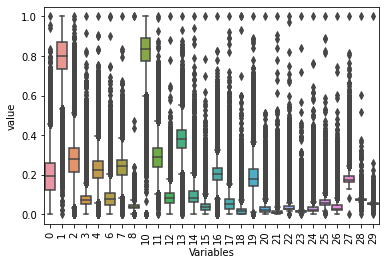

In [54]:
import seaborn as sns
sns.boxplot(data=model_X)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('value')

Int64Index([ 0,  1,  2,  3,  4,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64')


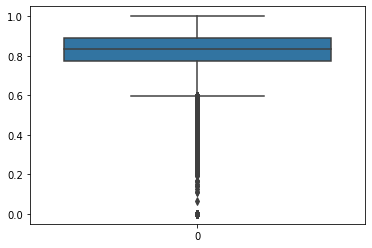

In [55]:
sns.boxplot(data=model_X[10])
print(model_X.columns)
# just to check that graph is dillusional, but actually lot of columns have outliers

In [57]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        lower = model_X[col].quantile(.05)
        upper = model_X[col].quantile(.95)
        model_X[col] = model_X[col].clip(lower=lower, upper=upper)

final_df=cap_data(model_X)

capping the  0
capping the  1
capping the  2
capping the  3
capping the  4
capping the  6
capping the  7
capping the  8
capping the  10
capping the  11
capping the  12
capping the  13
capping the  14
capping the  15
capping the  16
capping the  17
capping the  18
capping the  19
capping the  20
capping the  21
capping the  22
capping the  23
capping the  24
capping the  25
capping the  26
capping the  27
capping the  28
capping the  29


In [58]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        lower = valid_df[col].quantile(.05)
        upper = valid_df[col].quantile(.95)
        valid_df[col] = valid_df[col].clip(lower=lower, upper=upper)

final_df=cap_data(valid_df)

capping the  0
capping the  1
capping the  2
capping the  3
capping the  4
capping the  6
capping the  7
capping the  8
capping the  10
capping the  11
capping the  12
capping the  13
capping the  14
capping the  15
capping the  16
capping the  17
capping the  18
capping the  19
capping the  20
capping the  21
capping the  22
capping the  23
capping the  24
capping the  25
capping the  26
capping the  27
capping the  28
capping the  29


Text(0, 0.5, 'Value')

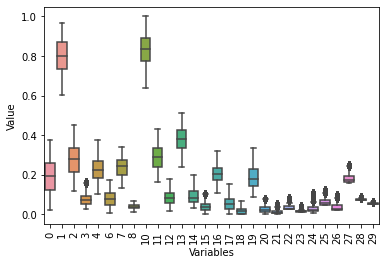

In [59]:
import seaborn as sns
sns.boxplot(data=model_X)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Value')

c:\python-3.9\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\python-3.9\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\python-3.9\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\python-3.9\lib\site-packages\seaborn\distributions.py:2056: FutureWa

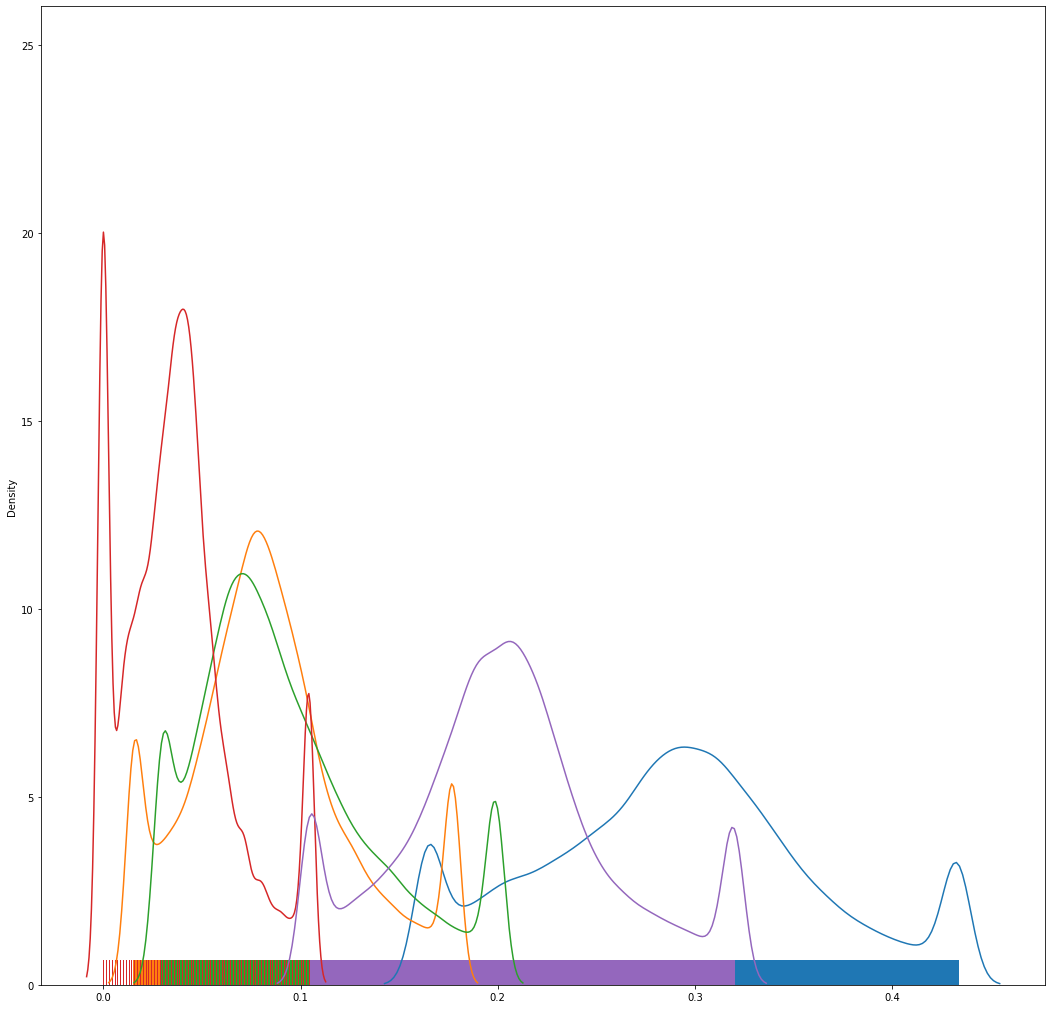

In [60]:
plt.figure(figsize = (18, 18))
sns.distplot(model_X[[11]], hist=False, rug=True)
sns.distplot(model_X[[12]], hist=False, rug=True)
sns.distplot(model_X[[14]], hist=False, rug=True)
sns.distplot(model_X[[15]], hist=False, rug=True)
sns.distplot(model_X[[16]], hist=False, rug=True)



plt.show()


c:\python-3.9\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


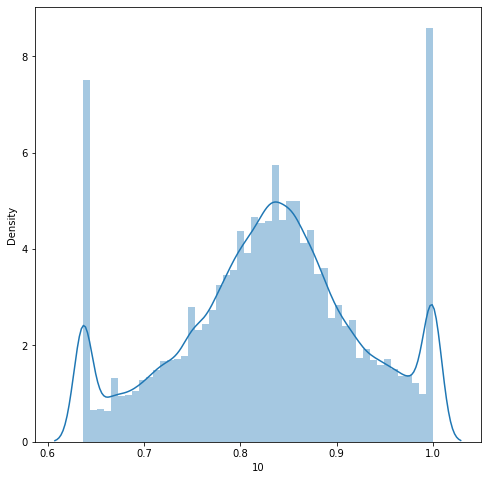

In [63]:
plt.figure(figsize = (8, 8))
data = model_X[10]
sns.distplot(data)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1869f4edbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x1869f4fa2e0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1869f4ed880>],
 'medians': [<matplotlib.lines.Line2D at 0x1869f4fa9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1869f4fad00>],
 'means': []}

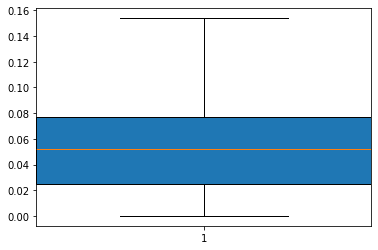

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(model_X[17], widths = 1, patch_artist = True)

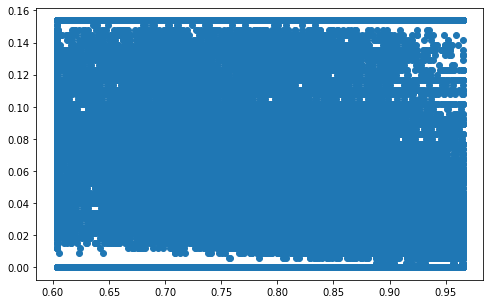

In [65]:
fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(model_X[1],model_X[17])

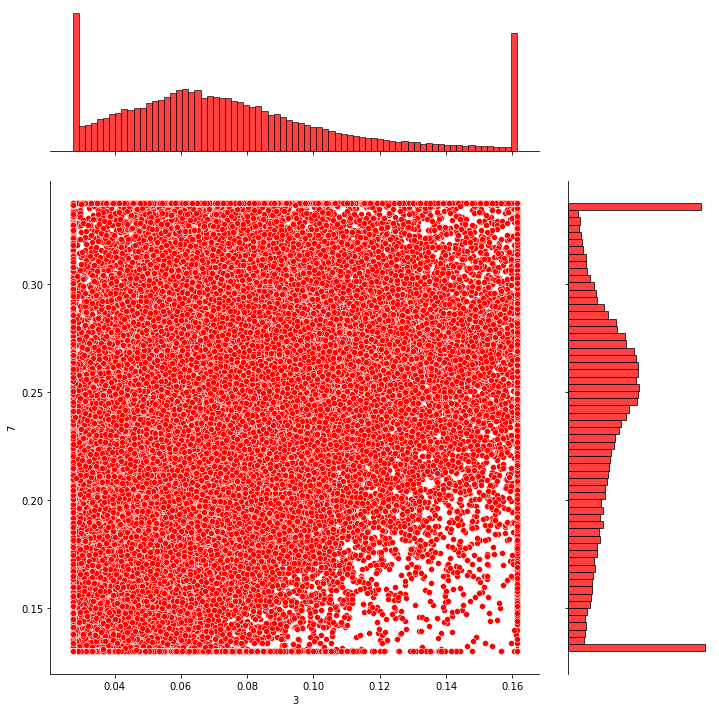

In [67]:
sns.jointplot(x=model_X[3], y=model_X[7], data=model_X, height=10, ratio=3, color="r")
plt.show()
#apparently no correlation between the columns


Text(0, 0.5, 'Value')

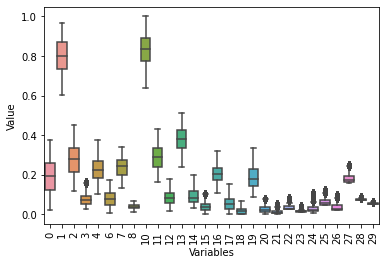

In [68]:
import seaborn as sns
sns.boxplot(data=model_X)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Value')

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSub

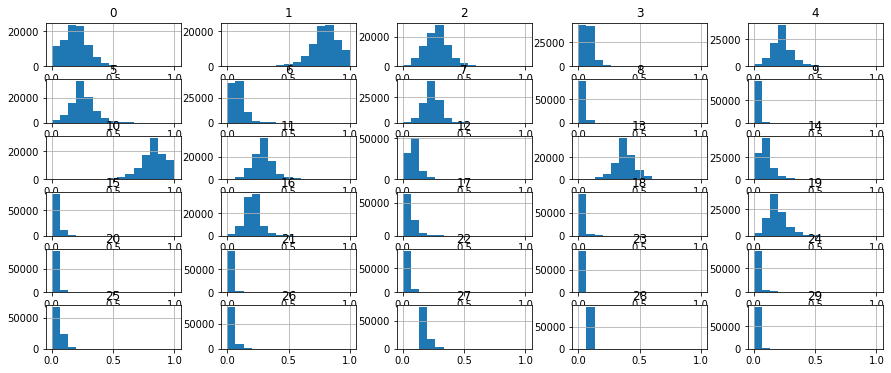

In [244]:
model_X.hist(bins=15, figsize=(15, 6))

In [69]:
model_X.skew() 
#If the skewness is between -0.5 and 0.5, the data are fairly symmetrical,since skewness is not above 0.75 for the columns, we dont need box cox transformation.

0     0.066912
1    -0.209287
2     0.096631
3     0.858045
4     0.237818
6     0.366416
7    -0.176065
8     0.168254
10   -0.177909
11    0.128758
12    0.468445
13   -0.050856
14    0.759545
15    0.656874
16    0.240681
17    0.644892
18    0.876968
19    0.544077
20    1.054221
21    1.667831
22    1.764718
23    1.545677
24    1.970919
25    1.486054
26    1.483805
27    1.226363
28    1.575278
29    1.623613
dtype: float64

model_df.kurtosis(

In [70]:
model_X.kurtosis()



0    -0.720649
1    -0.643660
2    -0.611284
3     0.193615
4    -0.325341
6    -0.620507
7    -0.643605
8    -0.365225
10   -0.443621
11   -0.512004
12   -0.163336
13   -0.391477
14   -0.146707
15    0.003211
16   -0.217177
17   -0.079005
18    0.183367
19   -0.376832
20    0.260803
21    1.977322
22    2.433435
23    1.719122
24    3.355637
25    1.228150
26    1.125298
27    0.567907
28    1.524398
29    1.518228
dtype: float64

c:\python-3.9\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


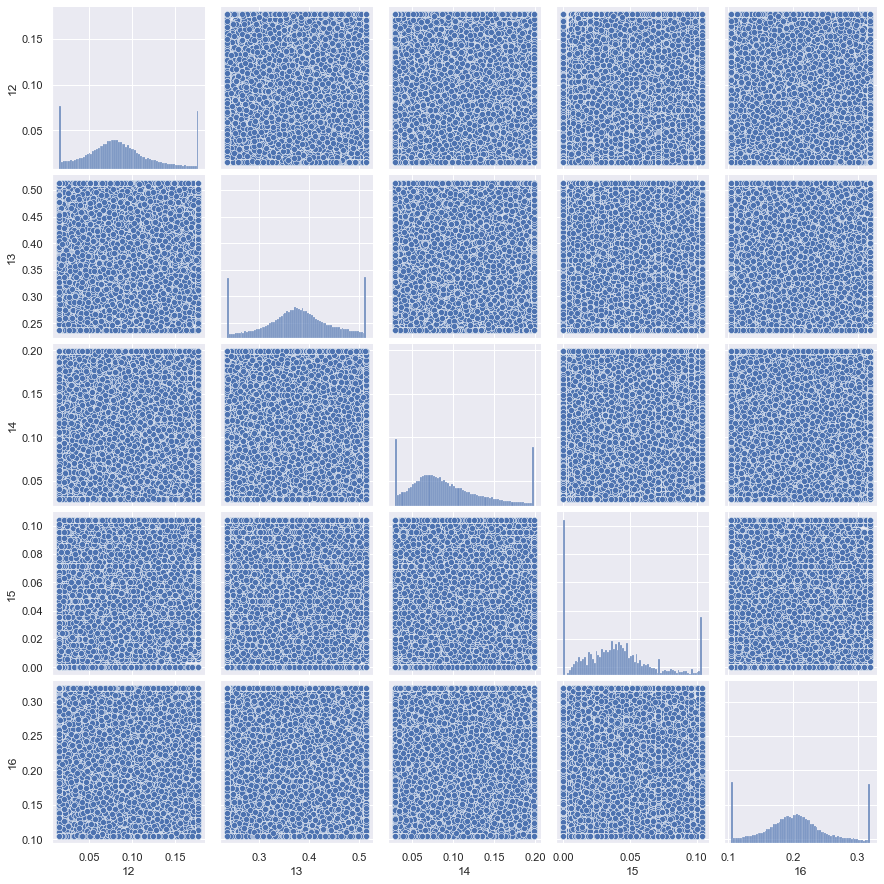

In [72]:
sns.set()
cols = [12,13,14,15,16]
sns.pairplot(model_X[cols], size = 2.5)
plt.show()

In [73]:
model_X


,0,1,2,3,4,6,7,8,10,11,...,20,21,22,23,24,25,26,27,28,29
0,0.170467,0.824606,0.338738,0.116928,0.208356,0.063203,0.277500,0.050818,0.8429,0.353253,...,0.004734,0.003766,0.041667,0.017544,0.031863,0.046837,0.020361,0.158732,0.069506,0.050661
1,0.374103,0.603407,0.249264,0.039440,0.222603,0.146760,0.173874,0.022727,0.6364,0.197822,...,0.017885,0.013183,0.041667,0.011696,0.022059,0.064655,0.020361,0.162966,0.069786,0.053635
2,0.374103,0.669274,0.162738,0.037955,0.277397,0.152116,0.179198,0.054545,0.7717,0.258758,...,0.015781,0.016949,0.055556,0.023392,0.107843,0.077674,0.027162,0.191561,0.076029,0.051711
3,0.217509,0.821073,0.261551,0.054283,0.339452,0.019282,0.327195,0.042614,0.9588,0.409773,...,0.014729,0.007533,0.041667,0.011696,0.012255,0.110128,0.020361,0.212987,0.082634,0.050661
4,0.071759,0.948517,0.332143,0.117366,0.224315,0.049277,0.292462,0.045455,0.9455,0.306447,...,0.011047,0.003766,0.027778,0.011696,0.009804,0.046837,0.025706,0.179081,0.069506,0.050661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93995,0.130442,0.905994,0.163491,0.031826,0.209589,0.039100,0.146317,0.011364,1.0000,0.163968,...,0.014203,0.039548,0.083333,0.035088,0.009804,0.046837,0.020361,0.158732,0.069506,0.050661
93996,0.210812,0.799874,0.289163,0.084913,0.224247,0.099089,0.223702,0.051977,0.8349,0.274360,...,0.011047,0.015066,0.041667,0.017544,0.068627,0.060675,0.020361,0.161290,0.071756,0.055147
93997,0.237761,0.815268,0.175773,0.035643,0.214384,0.111944,0.258969,0.068182,0.9078,0.305564,...,0.050500,0.050847,0.083333,0.035088,0.056373,0.076065,0.033714,0.170295,0.071315,0.054348
93998,0.171743,0.822587,0.324318,0.114227,0.204932,0.066417,0.281279,0.045750,0.8418,0.339123,...,0.076276,0.026365,0.041667,0.023392,0.024510,0.052068,0.072315,0.231178,0.077035,0.050661


In [74]:
print(model_y)

       default
0            0
1            0
2            0
3            0
4            0
...        ...
93995        1
93996        1
93997        1
93998        1
93999        1

[94000 rows x 1 columns]


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(model_X, model_y, test_size=0.3, random_state=0,shuffle=True)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\python-3.9\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [76]:
#p1=logreg.predict_proba(X_test)
# print(valid_df.head())
# print(valid_df.drop)
# print(valid_df.shape)
p1=logreg.predict_proba(valid_df)
score=logreg.score(valid_df,yval)
print(score)
# df = pd.DataFrame(p1)
# df2=pd.DataFrame(y_test)
# checking=pd.concat([df,df2],axis=1)
# checking

0.8695652173913043


In [74]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_test,score)
# print(confusion_matrix)

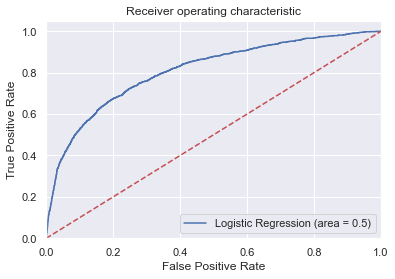

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yval, logreg.predict(valid_df))
fpr, tpr, thresholds = roc_curve(yval, logreg.predict_proba(valid_df)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.1f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [78]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python-3.9\python.exe -m pip install --upgrade pip' command.


In [79]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote=SMOTE()
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)
print("before smote",Counter(y_train))
print("after smote",Counter(y_train_smote))

before smote Counter({'default': 1})
after smote Counter({'default': 1})


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.3, random_state=0,shuffle=True)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\python-3.9\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python-3.9\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
p1=logreg.predict_proba(valid_df)
score=logreg.score(valid_df.values,yval)
print(score) 


0.8430434782608696


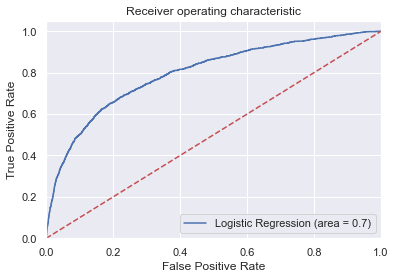

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yval, logreg.predict(valid_df))
fpr, tpr, thresholds = roc_curve(yval, logreg.predict_proba(valid_df)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.1f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [83]:
y_train_smote.shape

(116184, 1)

<AxesSubplot:xlabel='default'>

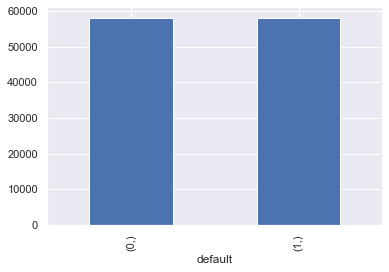

In [84]:
y_train_smote.value_counts().plot(kind='bar')

In [85]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [86]:

xgmodel = XGBClassifier()
xgmodel.fit(X_train_smote, y_train_smote)

# make predictions for test data
y_pred = xgmodel.predict(valid_df)
y_pred_proba = xgmodel.predict_proba(valid_df)
predictions = [round(value) for value in y_pred]
predictions


c:\python-3.9\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\python-3.9\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python-3.9\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[00:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [102]:
# evaluate predictions

accuracy = accuracy_score(yval, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 19.72%


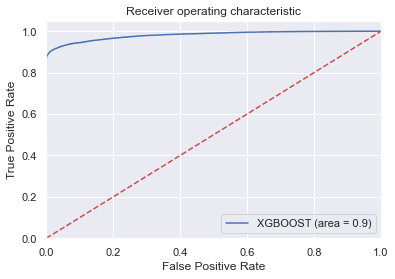

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, xgmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBOOST (area = %0.1f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print()

In [49]:
#predicting using xgboost

In [91]:
print(model_X.shape)

(94000, 28)


In [129]:
print(valid_df.shape)

(11500, 28)
